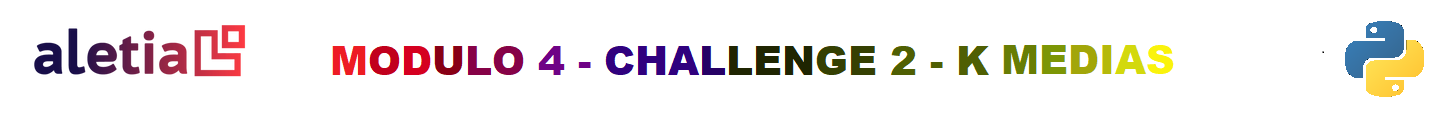

In [2]:
# Algunas bibliotecas necesarias
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn

## Repaso k-medias

El algoritmo *k*-medias sirve para encontrar un número previamente determinado de grupos a partir de un espacio con multiples dimensiones (es decir múltiples variables)

Suposiciones base del modelo de *k*-medias:

- El "centro del conglomerado" es la media aritmética de todos los puntos pertenecientes al conglomerado.
- Cada punto está más cerca de su propio centro de clúster que de otros centros de clúster.



Para los primeros ejercicios vamos a crear 4 grupos de datos en 2 dimensiones.

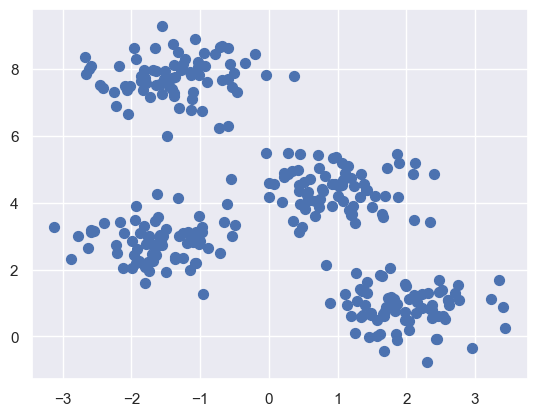

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

A pesar de que es un problema fácil de resolver a simple vista. Buscamos que esto lo haga automáticamente un algorítmo, en este caso *k*-medias. Usemos sklearn para resolver el problema

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[0 1 3 1 0 0 2 3 1 1 2 1 3 1 0 3 3 0 2 2 0 0 3 2 2 3 0 3 2 3 1 1 3 1 1 1 1
 1 2 0 3 2 3 3 2 2 1 2 1 0 2 0 1 0 0 2 1 2 1 0 1 3 1 2 2 2 1 0 1 2 3 2 1 2
 2 1 2 3 0 1 0 3 0 0 1 3 0 3 1 1 3 0 1 2 2 3 0 0 3 2 1 0 1 0 3 0 0 3 1 3 2
 2 0 1 0 3 1 0 0 3 2 0 2 0 0 0 0 2 0 2 1 2 2 0 1 2 2 1 3 1 1 2 3 2 3 2 1 3
 1 1 1 3 1 3 0 2 1 2 0 3 1 3 3 0 3 2 2 3 0 3 3 1 0 3 2 1 0 0 3 2 0 3 2 2 3
 3 3 3 0 1 3 2 3 3 2 2 2 3 2 1 3 2 0 2 3 1 2 1 3 1 3 2 3 3 1 2 2 0 0 3 1 0
 0 2 0 2 3 1 1 3 3 1 3 0 2 3 0 2 1 2 0 3 0 1 1 1 1 2 2 1 3 2 0 3 2 2 2 0 0
 1 3 3 2 0 1 2 3 1 3 0 0 2 2 3 0 0 0 3 1 1 0 0 3 0 0 0 1 2 1 3 0 0 1 1 1 0
 0 3 1 2]


Sklearn nos devuelve una lista de la etiqueta del grupo al que pertenece. 

Vamos a ver los resultados coloreando los datos con esas etiquetas.

Sklearn también nos devuelve los centroides. Grafiquémoslos igualmente

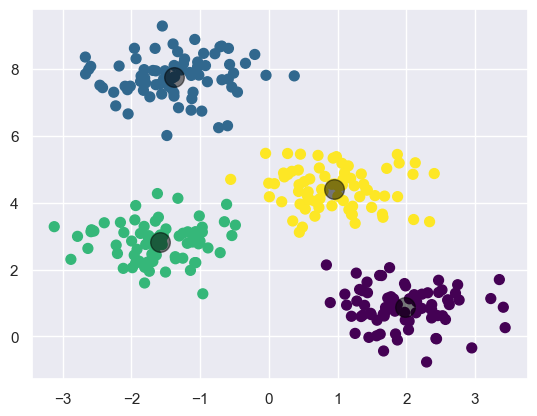

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Para encontrar los grupos, sklearn utiliza un algoritmo llamado Expectation maximization (E-M), este algorítmo es ampliamente utilizado en ciencia de datos pero *k*-medias es un caso particular muy fácil de entender. El procedimiento es el siguiente:
  1. Inventa aleatoriamente los centroides
  2. Repite los siguientes pasos hasta hallar la convergencia:
    - Paso-E: Asigna cada uno de los ejemplos al centroide mas cercano formando un grupo para cada centroide
    - Paso-M: Re calcula los centroides como el promedio de los puntos asignados a su grupo

A continuación podemos ver un diagrama del algorítmo:

![(run code in Appendix to generate image)](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.11-expectation-maximization.png?raw=1)

## Reto 1:

Anteriormente usamos la bilbioteca sklearn para hacer los clusters de la variable $X$ pero para este reto no utilizaremos ninguna implementación previa de *k*-means.

Escribe tu propio código para crear una función "***mi_algoritmo_kmeans***" que tenga los siguientes parámetros:
  - **X**: variable multidimensional
  - **n_clusters**: número de clusters a crear
  - **semilla**: semilla que servirá para replicar la inicialización aleatoria

La función debe devolver los siguientes datos:
  - **centroides**: un arreglo con las coordenadas de los centroides
  - **etiquetas**: un arreglo con las etiquetas de los grupos (clusters)

Sugerencia:

Puedes apoyarte (pero no es necesario) de las siguientes funciones:
  - from sklearn.metrics import pairwise_distances_argmin
  - np.random.RandomState(semilla)
  - np.random.RandomState(semilla).permutation(*parametros*)

## Se realiza la función y se grafica tanto los clusters como los centroides

Desafortunadamente no pude elaborar una función "a mano", por lo tanto tuve que auxiliarme de Scikit Learn para realizarla y poder hacer los siguientes retos, observar y dar mi conclusión, sin embargo, dejo los pasos del algoritmo para lo que queria hacer.

ALGORITMO:

Primero se tiene que tener ya decidido los numeros de clusters (K) con los que quieres contar (sea o no el ideal, eso luego se corrige o se corrobora con el metodo "elbow"), y también por supuesto tener un Data Set con los datos para el agrupamiento (cluster). Después de tener esos datos se sigue con el siguiente procedimiento:

1.- Escoger los puntos como los centroides iniciales (tiene que ser igual al numero de clusters definidos anteriormente = K), hacer esto totalmente al azar.

2.- Encontrar la distancia euclidiana que no es mas que la distancia entre 2 puntos en el espacio en el Data Set.

3.- Asignar cada punto de los datos al centroide más cercano usando la distancia encontrada en el paso anterior.
 
4.- Encontr

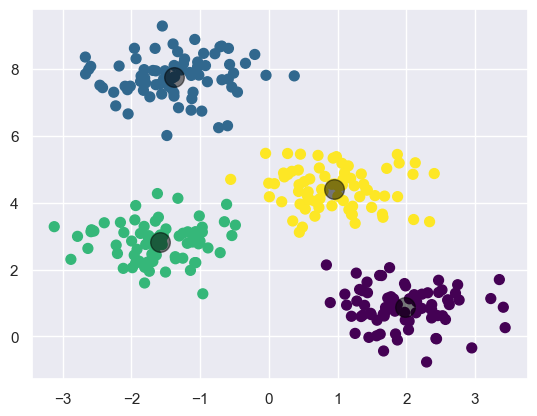

In [48]:
from sklearn.cluster import KMeans

def mi_algoritmo_kmeans(X, n_clusters, semilla = 2):
    
    
    np.random.seed(semilla)
    k_means = KMeans(n_clusters)
    k_means.fit(X)
    #y_kmeans = k_means.predict(X)
    #etiquetas = y_kmeans
    etiquetas = k_means.labels_
    centroides = k_means.cluster_centers_
    
    return centroides, etiquetas

# Vamos a probar la función en la variable X previamente creada
centroides, etiquetas = mi_algoritmo_kmeans(X, 4)

# Veamos los resultados
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);


print(f'Desafortunadamente no pude elaborar una función "a mano", por lo tanto tuve que auxiliarme de Scikit\
 Learn para realizarla y poder hacer los siguientes retos, observar y dar mi conclusión, sin embargo, dejo\
 los pasos del algoritmo para lo que queria hacer.\n')

print(f'\033[1mALGORITMO:\n')

print(f'\033[0mPrimero se tiene que tener ya decidido los numeros de clusters (K) con los que quieres contar (sea\
 o no el ideal, eso luego se corrige o se corrobora con el metodo "elbow"), y también por supuesto tener un\
 Data Set con los datos para el agrupamiento (cluster). Después de tener esos datos se sigue con el siguiente\
 procedimiento:\n\n1.- Escoger los\033[1m puntos \033[0mcomo los centroides iniciales (tiene que ser igual al\
 numero de clusters definidos anteriormente = K), hacer esto totalmente al azar.\n\n2.- Encontrar la distancia\
 euclidiana que no es mas que \033[1mla distancia entre 2 puntos en el espacio \033[0men el Data Set.\n\n3.-\
 Asignar cada punto de los datos al centroide más cercano usando la distancia encontrada en el paso anterior.\n\
 \n4.- Encontrar el nuevo centroide tomando el promedio de los puntos en cada agrupación (cluster).\n\n5.-\
 Repetir varias veces del \033[1mpaso 2 al 4\033[0m, esto es lo que se conoce como la iteración y puede tener\
 un número fijo por ejemplo 50 ó 100 (dependiendo del Data Scientist o la empresa) o se puede iterar hasta que\
 la ubicación de los centroides ya no cambien para nada, por lo cual se asume que ese sería el resultado final.')

Compara esta gráfica resultante con la gráfica anterior. Deberíamos tener resultados muy similares.

Es importante conocer las limitaciones de los algorítmos que usamos. Por ello, como parte de esta serie de retos exploraremos algunas de estas limitaciones.

## Reto 2:

Repite el ejercicio anterior (utilizando tu función) pero esta vez indica al algorímto que cree 3 clusters en vez de 4. Comparte tus conclusiones.

## Se realiza la función y se grafica. Conclusiones al final

Escribe aquí tus conclusiones:

No funciona muy bien debido a que al parecer son muy pocos clusters para los datos, en la gráfica se puede apreciar que el algoritmo no sabe muy bien que hacer, ya que es ilógico y erroneo a mi parecer que en la agrupación amarilla haya puntos muy alejados y los catalogó con ese cluster(amarillo), mientras que en la agrupación azul por ejemplo haya puntos mucho mas cercanos al centroide del cluster amarillo y no los haya catalogado con ese grupo también, habría que graficar con el metodo elbow para verificar cual es el numero ideal de clusters para este caso.


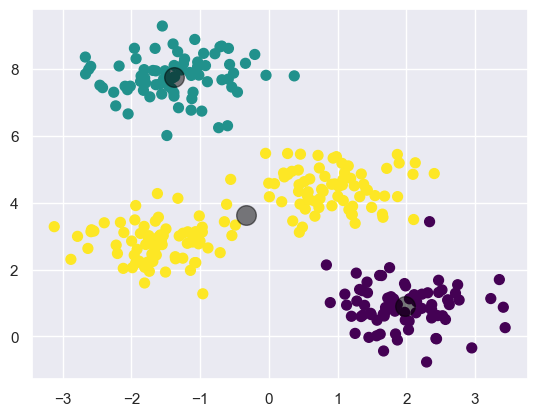

In [12]:
# Coloca aquí tu código
def mi_algoritmo_kmeans(X, n_clusters, semilla = 2):
    
    
    np.random.seed(semilla)
    k_means = KMeans(n_clusters)
    k_means.fit(X)
    #y_kmeans = k_means.predict(X)
    #etiquetas = y_kmeans
    etiquetas = k_means.labels_
    centroides = k_means.cluster_centers_
    
    return centroides, etiquetas

# Vamos a probar la función en la variable X previamente creada
centroides, etiquetas = mi_algoritmo_kmeans(X, 3)

# Veamos los resultados
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);


print('Escribe aquí tus conclusiones:\n')
print('No funciona muy bien debido a que al parecer son muy pocos clusters para los datos, en la gráfica se puede\
 apreciar que el algoritmo no sabe muy bien que hacer, ya que es ilógico y erroneo a mi parecer que en la\
 agrupación amarilla haya puntos muy alejados y los catalogó con ese cluster(amarillo), mientras que en la\
 agrupación azul por ejemplo haya puntos mucho mas cercanos al centroide del cluster amarillo y no los haya\
 catalogado con ese grupo también, habría que graficar con el metodo elbow para verificar cual es el numero\
 ideal de clusters para este caso.')

## Se realiza el método ELBOW y se puede notar que el punto de inflexión se encuentra en el numero 4, por lo cual es el numero ideal de clusters para los datos proporcionados (X)

C:\Users\Pablo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


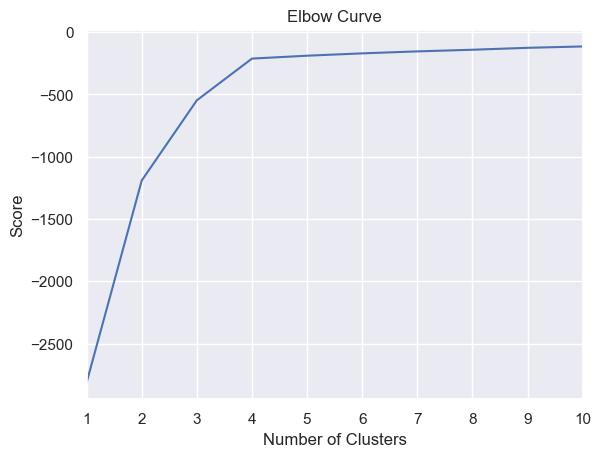

In [7]:
n = range(1, 11) # the number of clusters
elbow = [KMeans(n_clusters=i) for i in n] # running the algorithm n times to get the knee bend shape
#kmeans

# within-cluster sum for every value of K from 1 to 10 
score = [elbow[i].fit(X).score(X) for i in range(len(elbow))] 
#score

# plot the within-cluster sum vs every value of K from 1 to 10 
plt.plot(n,score)
plt.xlim([1,10])
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## Reto 3:

La variable X que creamos tiene 2 dimensiones

In [8]:
X.shape

(300, 2)

Vamos a tomar una de estas dimensiones y multiplicarla por el escalar $e=100$ y visualicemos nuestro nuevo dataset $X$_$reescala$

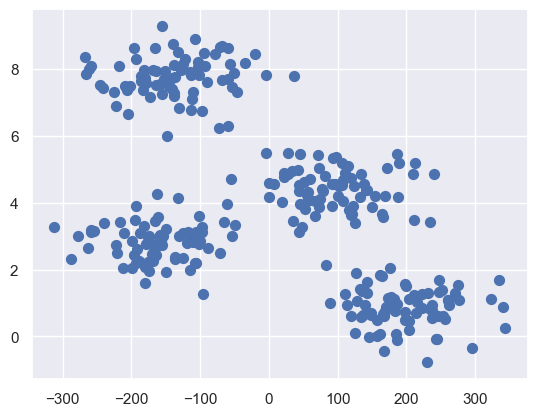

In [9]:
e = 100
X_reescala = np.stack((e*X[:, 0], X[:, 1]), axis=1)
plt.scatter(X_reescala[:, 0], X_reescala[:, 1], s=50);

La gráfica luce idéntica. Sin embargo nota como el eje $horizontal$ tiene valores 10 veces mas grandes

Ahora aplica el alogrítmo de *k*-medias para crear 4 grupos pero esta vez sobre las variables $X$_$reescala$ y escribe tus conclusiones sobre los resultados

## Se realiza la función y se grafica. Conclusiones al final

Escribe aquí tus conclusiones:

El algoritmo falla totalmente ya que el algoritmo divide los clusters "correctamente",sin embargo, al momento de etiquetarlos se confunde totalmente y los categoriza mal y eso se puede ver con los colores que les dio y como se los aplicó, no tienen sentido a mi consideración, yo creo que por la escala que se le dio a una de las dimensiones (en este caso a la primer columna) la cual hace referencia al eje X, sin embargo aunque los centroides tambien salieron escalados parece que quedan en medio y a partir de ahí se dividen en 2 grupos cada etiqueta y quedan separados, el algoritmo no sabe como agrupar los puntos ya que la segunda dimension (eje y) sigue con los numeros anteriores y ese es el motivo del resultado.


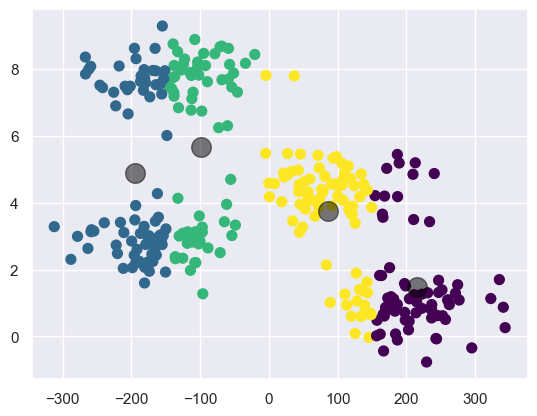

In [10]:
# Coloca aquí tu código
def mi_algoritmo_kmeans(X_reescala, n_clusters, semilla = 2):
    
    
    np.random.seed(semilla)
    k_means = KMeans(n_clusters)
    k_means.fit(X_reescala)
    #y_kmeans = k_means.predict(X_reescala)
    #etiquetas = y_kmeans
    etiquetas = k_means.labels_
    centroides = k_means.cluster_centers_
    
    return centroides, etiquetas

# Vamos a probar la función en la variable X previamente creada
centroides, etiquetas = mi_algoritmo_kmeans(X_reescala, 4)

# Veamos los resultados
plt.scatter(X_reescala[:, 0], X_reescala[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);


print('Escribe aquí tus conclusiones:\n')
print('El algoritmo falla totalmente ya que el algoritmo divide los clusters "correctamente",sin embargo,\
 al momento de etiquetarlos se confunde totalmente y los categoriza mal y eso se puede ver con los colores\
 que les dio y como se los aplicó, no tienen sentido a mi consideración, yo creo que por la escala que se le dio\
 a una de las dimensiones (en este caso a la primer columna) la cual hace referencia al eje X, sin embargo\
 aunque los centroides tambien salieron escalados parece que quedan en medio y a partir de ahí se dividen en\
 2 grupos cada etiqueta y quedan separados, el algoritmo no sabe como agrupar los puntos ya que la segunda\
 dimension (eje y) sigue con los numeros anteriores y ese es el motivo del resultado.')

## Reto 4 (opcional): No se realizó

Los colores en computación suelen ser representados como una combinación de números asociados a los colores *red*, *green*, *blue*

veamos un ejemplo:

In [ ]:
#!pip install sty
from sty import fg, bg, ef, rs
from sty import Style, RgbFg

rmax = 255
gmax = 255
bmax = 255
salto = 50

for r in range(0,rmax,salto):
  for g in range(0,gmax,salto):
    for b in range(0,bmax,salto):
      fg.color = Style(RgbFg(r, g, b))
      texto = fg.color + chr(9608)*3 + ' r=' + str(r) + ', g=' + str(g) + ', b=' + str(b)
      print(texto)

Como podemos  observar, la escala de *red*, *green*, *blue* va de 0 a 255
es decir podemos crear $255^3 = 16581375$ combinaciones de colores diferentes

Las imagenes estan formadas por pixeles en esta escala de colores

Interpreta *red*, *green*, *blue* como 3 dimensiones y crea 16 clusters de colores.

Con los centroides de estos clusters crea 16 colores e imprimelos como en el código anterior.

Bonus: Utiliza estos 16 colores para recrear una imagen pero solamente utilizando estos 16 colores.

### Ejemplo:

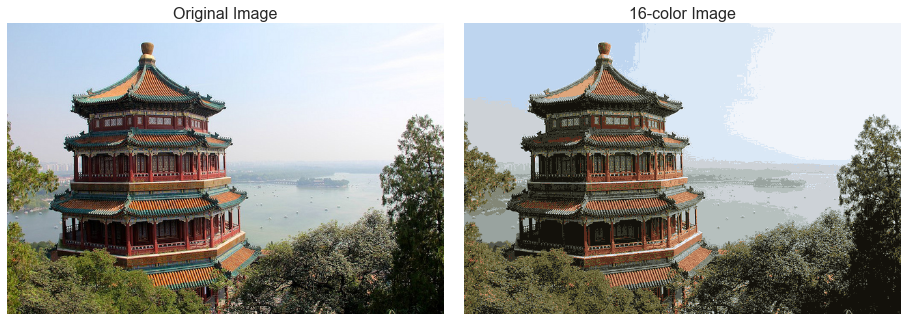

In [ ]:
# Coloca aquí tu código
# -----------------------------------------------------------------------------------

# Código para crear los clusters




# Código para crear los 16 colores




# Código para recrear una imagen con los 16 colores




